In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

# Taylor Series. Computing Function Value Approximations.

## Function approximation.
In mathematics, approximation theory is concerned with how functions can best be approximated with simpler functions, and with quantitatively characterizing the errors introduced thereby. Note that what is meant by best and simpler will depend on the application.

A closely related topic is the approximation of functions by generalized Fourier series, that is, approximations based upon summation of a series of terms based upon orthogonal polynomials.

One problem of particular interest is that of approximating a function in a computer mathematical library, using operations that can be performed on the computer or calculator (e.g. addition and multiplication), such that the result is as close to the actual function as possible. This is typically done with polynomial or rational (ratio of polynomials) approximations.

The objective is to make the approximation as close as possible to the actual function, typically with an accuracy close to that of the underlying computer's floating point arithmetic. This is accomplished by using a polynomial of high degree, and/or narrowing the domain over which the polynomial has to approximate the function. Narrowing the domain can often be done through the use of various addition or scaling formulas for the function being approximated. Modern mathematical libraries often reduce the domain into many tiny segments and use a low-degree polynomial for each segment.

#### Polynomials.
Polynomials can be used to approximate complicated curves, for example, the shapes of letters in typography, given a few points. A relevant application is the evaluation of the natural logarithm and trigonometric functions: pick a few known data points, create a lookup table, and interpolate between those data points. This results in significantly faster computations. Polynomial interpolation also forms the basis for algorithms in numerical quadrature and numerical ordinary differential equations and Secure Multi Party Computation, Secret Sharing schemes.

Polynomial interpolation is also essential to perform sub-quadratic multiplication and squaring, where an interpolation through points on a polynomial which defines the product yields the product itself. `For example, given a = f (x) = a0x0 + a1x1 + ... and b = g (x) = b0x0 + b1x1 + ..., the product ab is equivalent to W (x) = f (x) g (x)`. Finding points along W (x) by substituting x for small values ​​in f (x) and g (x) yields points on the curve. Interpolation based on those points will yield the terms of W (x) and subsequently the product ab. In the case of Karatsuba multiplication this technique is substantially faster than quadratic multiplication, even for modest-sized inputs. This is especially true when implemented in parallel hardware.

#### Optimal polynomials.
Once the domain (typically an interval) and degree of the polynomial are chosen, the polynomial itself is chosen in such a way as to minimize the worst-case error. That is, the goal is to minimize the maximum value of $\mid P(x)-f(x)\mid$, where P(x) is the approximating polynomial, f(x) is the actual function, and x varies over the chosen interval. For well-behaved functions, there exists an Nth-degree polynomial that will lead to an error curve that oscillates back and forth between $+\varepsilon$  and $-\varepsilon$ a total of N+2 times, giving a worst-case error of $\varepsilon$ . It is seen that there exists an Nth-degree polynomial can interpolate N+1 points in a curve. Such a polynomial is always optimal. It is possible to make contrived functions f(x) for which no such polynomial exists, but these occur rarely in practice.

For example, the graphs shown to the right show the error in approximating log(x) and exp(x) for N = 4. The red curves, for the optimal polynomial, are level, that is, they oscillate between $+\varepsilon$  and $-\varepsilon$  exactly. Note that, in each case, the number of extrema is N+2, that is, 6. Two of the extrema are at the end points of the interval, at the left and right edges of the graphs.
![Error IMG](Example1.jpg)

#### Derivative of a function.
The derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to a change in its argument (input value). Derivatives are a fundamental tool of calculus. For example, the derivative of the position of a moving object with respect to time is the object's velocity: this measures how quickly the position of the object changes when time advances.

The derivative of a function of a single variable at a chosen input value, when it exists, is the slope of the tangent line to the graph of the function at that point. The tangent line is the best linear approximation of the function near that input value. For this reason, the derivative is often described as the "instantaneous rate of change", the ratio of the instantaneous change in the dependent variable to that of the independent variable.

Derivatives can be generalized to functions of several real variables. In this generalization, the derivative is reinterpreted as a linear transformation whose graph is the best linear approximation to the graph of the original function.

The process of finding a derivative is called differentiation. The reverse process is called antidifferentiation. The fundamental theorem of calculus relates antidifferentiation with integration. Differentiation and integration constitute the two fundamental operations in single-variable calculus.

*Definition*:

A function $ y = f(x) $ , $ x \in D $.
Тhe derivative of the function $f(x)$ in point $x_0 \in D$ is called limit.

### $y^{\prime}(x_0) =\displaystyle \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x} $ , *where* $ \Delta x = x - x_0 $, $ \Delta y = y(x_0 + \Delta x) - y(x_0) $

**Note!** The derivative is a local property of the function in
a certain point. When the derivative exists at any point in
its definition domain, we say that the function has a derivative or
is differentiable in $D$.


*So, let's see what a function of sin(x) and its derivative at a point look like.*

In [3]:
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    return (function(point + precision) - function(point)) / precision

def plot_derivative_at_point(function, point, min_x = -5, max_x = 8):
    """
    Plots the function in the range [x_min; x_max]. Computes the tangent line to the function
    at the given point and also plots it
    """
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)
    
    slope = calculate_derivative_at_point(function, point)
    
    intercept = function(point) - slope * point
    tangent_line_x = np.linspace(point - 2, point + 2, 10)
    tangent_line_y = slope * tangent_line_x + intercept
    plt.plot(x, y, label='sin(x)')
    plt.plot(tangent_line_x, tangent_line_y, label='der.')
    plt.title(f'Derivative at point: {point}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [4]:
point_1 = 1.571
point_2 = 2.815
point_3 = 4.713

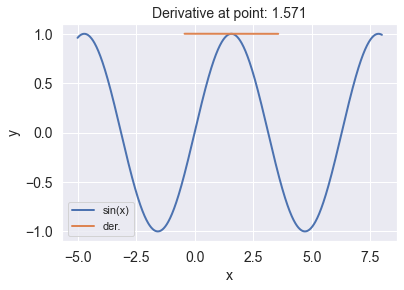

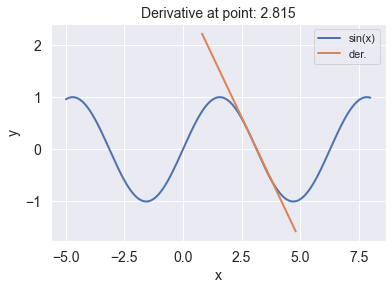

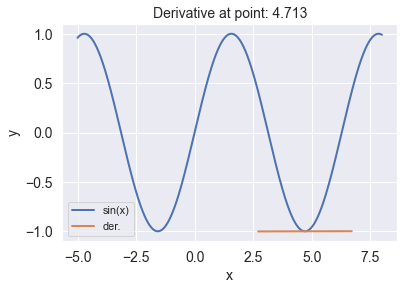

In [5]:
plot_derivative_at_point(lambda x: np.sin(x), point_1)
plot_derivative_at_point(lambda x: np.sin(x), point_2)
plot_derivative_at_point(lambda x: np.sin(x), point_3)

#### Higher-order derivatives.

The process of differentiation can be applied several times in succession, leading in particular to **the second derivative f″** of the function f, which is just the **derivative of the derivative f′**. The second derivative often has a useful physical interpretation. For example, if f(t) is the position of an object at time t, then f′(t) is its speed at time t and f″(t) is its acceleration at time t. Newton’s laws of motion state that the acceleration of an object is proportional to the total force acting on it; so second derivatives are of central importance in dynamics. The second derivative is also useful for graphing functions, because it can quickly determine whether each critical point, c, corresponds to a local maximum (f″(c) < 0), a local minimum (f″(c) > 0), or a change in concavity (f″(c) = 0). Third derivatives occur in such concepts as curvature; and even fourth derivatives have their uses, notably in elasticity.

*The derivative of the derivative of a function is called the second derivative and is written in the form:*

### $$ f^{\prime\prime}(x) = (f^\prime(x))^\prime = \frac{d}{dx}(\frac{df}{dx}) = \frac{d^2f}{dx^2} $$

*Similarly, the third derivative is written as:*
### $$ f^{\prime\prime\prime}(x) = (f^{\prime\prime}(x))^\prime = \frac{d}{dx}(\frac{d^2f}{dx^2}) = \frac{d^3f}{dx^3} $$

*In the general case, the n-th derivative of a function is defined as follows:*
### $$ f^{n}(x) = (f^{(n-1)}(x))^\prime = \frac{d}{dx}(\frac{d^{(n-1)}f}{dx^{(n-1)}}) = \frac{d^nf}{dx^n} (G. Leibnitz) $$ 

## Taylor series

n mathematics, the Taylor series of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point. For most common functions, the function and the sum of its Taylor series are equal near this point. Taylor's series are named after Brook Taylor who introduced them in 1715.

The partial sum formed by the first n + 1 terms of a Taylor series is a polynomial of degree n that is called the nth Taylor polynomial of the function. Taylor polynomials are approximations of a function, which become generally better as n increases. Taylor's theorem gives quantitative estimates on the error introduced by the use of such approximations. If the Taylor series of a function is convergent, its sum is the limit of the infinite sequence of the Taylor polynomials. A function may differ from the sum of its Taylor series, even if its Taylor series is convergent. A function is analytic at a point x if it is equal to the sum of its Taylor series in some open interval containing x. This implies that the function is analytic at every point of the interval.

#### *Taylor series definition:*

*The `Taylor series` of a real or complex-valued function $f(x)$ that is infinitely differentiable at $a$ real or complex number $a$ is the power series:*

### $$ f(a) + \frac{f^\prime(a)}{1!}(x-a)+\frac {f^{\prime\prime}(a)}{2!}(x-a)^2 + \frac {f^{\prime\prime\prime}(a)}{3!}(x-a)^3+ \cdots $$

*Where $n!$ denotes the factorial of $n$. In the more compact sigma notation, this can be written as:*

### $$ \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n $$

*where $f(n)(a)$ denotes the nth derivative of $f$ evaluated at the point $a$. (The derivative of order zero of $f$ is defined to be $f$ itself and $(x − a)0$ and $0!$ are both defined to be 1.)*

`If `**`zero`**` is the point where the derivatives are considered, a Taylor series is also called a `**`Maclaurin series`**`, after Colin Maclaurin, who made extensive use of this special case of Taylor series in the 18th century.`

#### *Maclaurin series definition:*

### $$ f(x) \approx f(0) + f^{\prime}(0)x + \frac{f^{\prime\prime}(0)}{2!}x^2 + \frac{f^{\prime\prime\prime}(0)}{3!}x^3 + \cdots + \frac{f^{n}(0)}{n!}x^n $$

### So let's look at some extensions of Taylor series to common functions like $cos(x)$ and $e^x$.

### Taylor series for $e^x$ : $$ e^x \approx \sum_{n=0}^{\infty} \frac{x^n}{n!} \approx 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \frac{x^{6}}{6!} + \cdots $$

We can combine these terms in a for loop of Python code to estimate $e^x$. The code below calculates the sum of the terms of the Taylor Series expansion of $e^2$

*There are two input arguments: `x` is the number $e$ is raised to, and `n` is the number of terms in the Taylor Series.*

In [6]:
def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    return e_approx

In [7]:
# one term
print(func_e(2,1))

1.0


In [8]:
# five term
print(func_e(2,5))

7.0


Let's compare our Taylor Series approximation to Python's `math.exp()` function. Python's `math.exp()` function raises $e$ to any power. In our case, we want to use `math.exp(2`) because we want to calculate $e^2$.

In [9]:
print(math.exp(2))

7.38905609893065


Аfter five terms we see that we are quite close to the real result. So let's increase the terms to ten and see what happens.

In [10]:
# ten terms
print(func_e(2,10))
print(math.exp(2))

7.3887125220458545
7.38905609893065


Аs we see after the tenth term we get remarkable accuracy to the second decimal place.

### Taylor series for $cos(x)$ :  $$ cos(x) \approx \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n}}{(2n)!} \approx 1-\frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!} - \frac{x^{10}}{10!} + \cdots $$

We can code this formula into a function that contains a for loop. Note the variable `x` is the value we are trying to find the cosine of, the variable `n` is the number of terms in the Taylor Series, and the variable `i` is the loop index which is also the Taylor Series term number. We are using a separate variable for the coefficient `coef` which is equal to $(−1)^i$, the numerator `num` which is equal to $x^{2i}$ and the denominator `denom` which is equal to $(2^i)!$. Breaking the Taylor Series formula into three parts can cut down on coding errors.

In [11]:
def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    return cos_approx

Let's use our `func_cos()` function to estimate the cosine of 45 degrees. Note that `func_cos()` function computes the cosine of an angle in radians. If we want to calculate the cosine of 45 degrees using our function, we first have to convert 45 degrees into radians. Luckily, Python's `math` module has a function called `radians()`.

In [12]:
print(func_cos(math.radians(45),5))

0.7071068056832942


Using our `func_cos()` function and 5 terms in the Taylor Series approximation, we estimate the cosine of 45 degrees. Let's check our `func_cos()` function compared to Python's `cos()` function from the `math` module.

In [13]:
print(math.cos(math.radians(45)))

0.7071067811865476


Using Python's `cos()` function, the value is very close to the approximation calculated using our `func_cos()` function.

### Build a plot to compare the Taylor Series approximation to Python's `cos(x)` function

In the last part of this post, we are going to build a plot that shows how the Taylor Series approximation calculated by our `func_cos()` function compares to Python's `cos()` function.
The idea is to make a plot that has one line for Python's `cos()` function and lines for the Taylor Series approximation based on different numbers of terms.

For instance, if we use `3 terms` in the Taylor Series approximation, our plot has two lines. One line for Python's `cos()` function and one line for our `func_cos()` function with three terms in the Taylor series approximation. We'll calculate the cosine using both functions for angles between $−2π$ radians and $2π$ radians.

In [14]:
def plot_taylor_series_for_cos(terms):
    angles = np.linspace(-2*np.pi,2*np.pi,1000)
    p_cos = np.cos(angles)

    fig, ax = plt.subplots()
    
    # plot the real function
    ax.plot(angles,p_cos)

    # set up legend
    legend_list = ['cos() function']

    for i in range(1,terms + 1):
        t_cos = [func_cos(angle, i) for angle in angles]
        ax.plot(angles,t_cos)
        legend_list.append(f'Taylor Series - {i} terms')

    ax.set_title('Taylor Series approximation to Python\'s cos()')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim([-10,6])
    ax.legend(legend_list)

    plt.show()

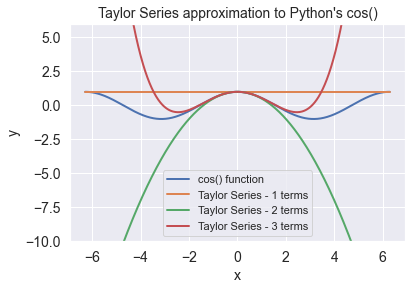

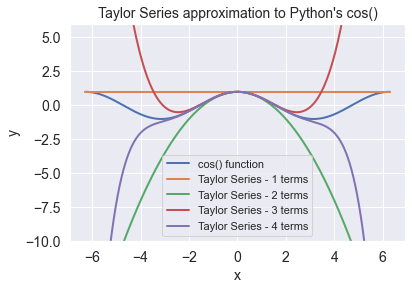

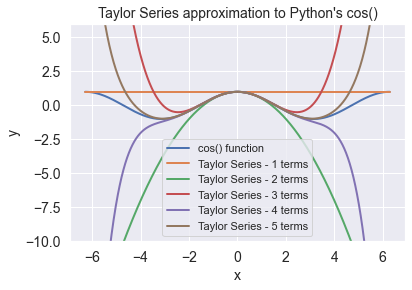

In [15]:
plot_taylor_series_for_cos(terms = 3)
plot_taylor_series_for_cos(terms = 4)
plot_taylor_series_for_cos(terms = 5)

We see the Taylor Series with `5 terms` (the brown line) comes closest to approximating Python's `cos()` function. The Taylor Series with 5 terms is a good approximation of the cosine of angles between about $−π$ and $π$ radians. The Taylor Series with 5 terms is a worse approximation for angles less than $−π$ or greater than $π$.

### Build a plot to compare the Taylor Series approximation to Python's `exp(x)` function

In [16]:
def plot_taylor_series_for_e(terms):
    fig, ax = plt.subplots()

    # range of x values to look at
    x_vals = np.linspace(0,3,1000)

    # plot the real function  
    ax.plot(x_vals, np.exp(x_vals), label="$e^x$")

    # intialize the array of  y_vals
    y_vals = np.zeros([terms,len(x_vals)])

    # loop through the number of terms
    for i in range(terms):
        new_term = x_vals**i / math.factorial(i)
        y_vals[i,:] = y_vals[i-1,:] + new_term

        #loop through number of terms and plot
        ax.plot(x_vals,y_vals[i,:], label = f'Taylor Series - {i + 1} terms')

    ax.set_title('Taylor Series approximation to Python\'s exp()')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

    plt.show()

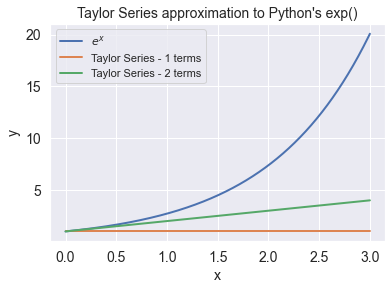

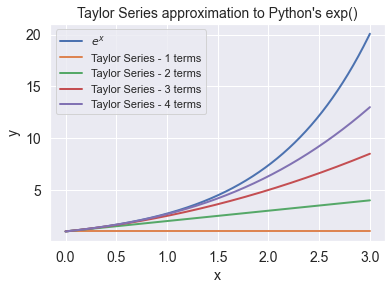

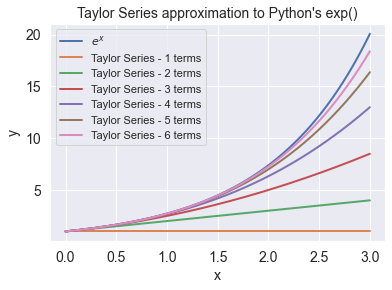

In [17]:
plot_taylor_series_for_e(terms = 2)
plot_taylor_series_for_e(terms = 4)
plot_taylor_series_for_e(terms = 6)

Nice! We see how increasing the order of our polynomial brings us ever closer to the true form of the  $e^x$  function. Using this code a template, we can now compute the Taylor series expansion for a number of different functions. 

### Sources:
1. Мain source `Wikipedia`
    * [Polynomial](https://en.wikipedia.org/wiki/Polynomial_interpolation)
    * [Function approximation](https://en.wikipedia.org/wiki/Approximation_theory)
    * [Derivative](https://en.wikipedia.org/wiki/Derivative)
    * [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series)
2. Тens of hours digging in all sorts of internet scientific pages.